# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
%matplotlib inline

# Importing Dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

In [6]:
data['PRICE'] = boston.target 

# Data Preprocessing

In [7]:
data.shape

(506, 14)

In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [10]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [11]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


# Exploratory Data Analysis

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

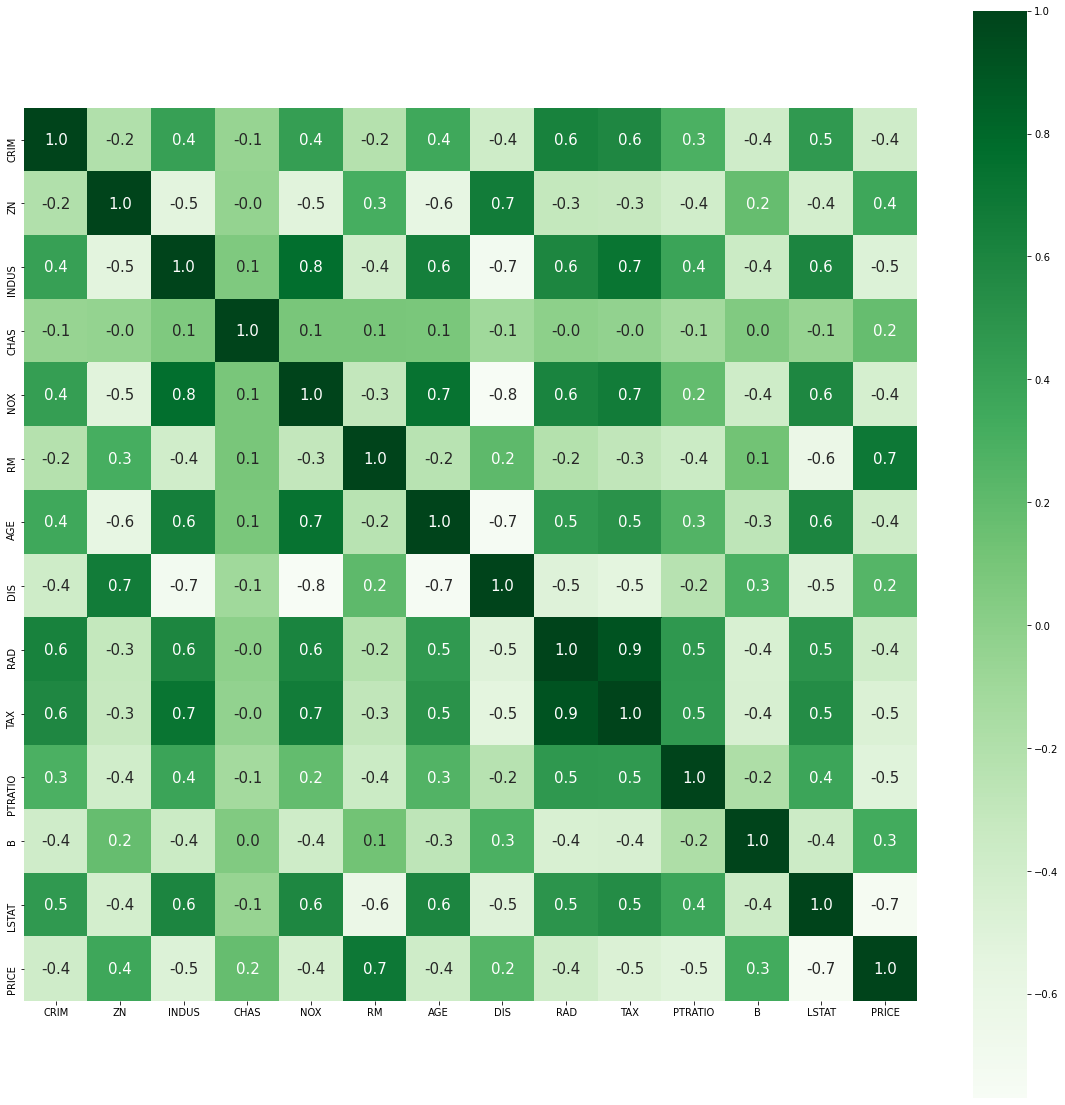

In [16]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

<AxesSubplot:>

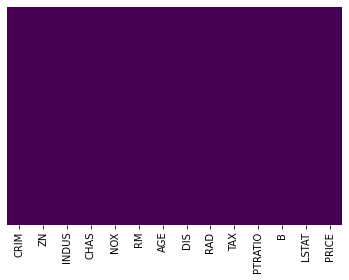

In [17]:
# Checking the null values using heatmap
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='RAD', ylabel='count'>

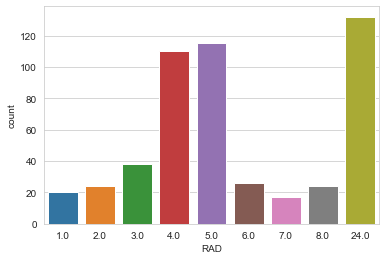

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='RAD',data=data)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

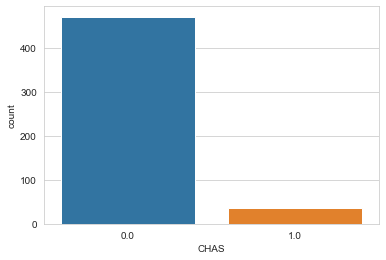

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=data)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

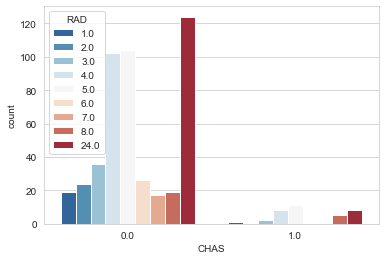

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',hue='RAD',data=data,palette='RdBu_r')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE'>

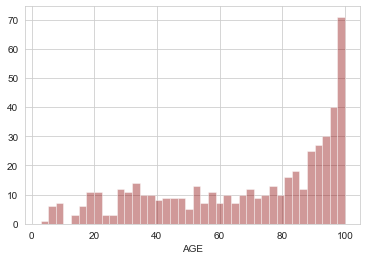

In [21]:
sns.distplot(data['AGE'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='CRIM'>

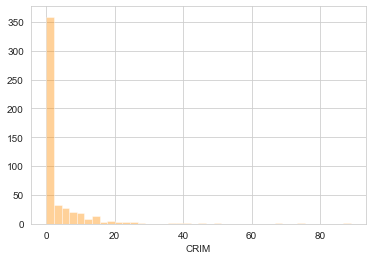

In [22]:
sns.distplot(data['CRIM'].dropna(),kde=False,color='darkorange',bins=40)

<AxesSubplot:xlabel='RM'>

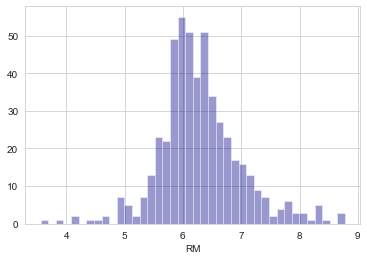

In [23]:
sns.distplot(data['RM'].dropna(),kde=False,color='darkblue',bins=40)

# Model Fitting

## Linear Regression

In [24]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [25]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [26]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
# Value of y intercept
lm.intercept_

36.357041376595205

In [28]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


### Model Evaluation

#### Training Data

In [29]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [30]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


#### Testing Data

In [31]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [32]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409195
Adjusted R^2: 0.6850685326005713
MAE: 3.8590055923707407
MSE: 30.053993307124127
RMSE: 5.482152251362974


### Model Visualization

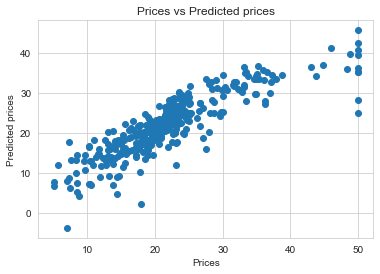

In [33]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

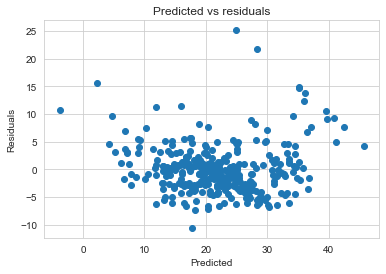

In [34]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


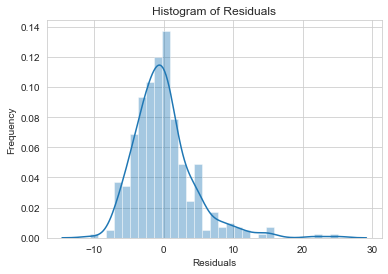

In [35]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
y_pred = reg.predict(X_train)

## Model Evaluation

#### Training Data

In [38]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9780446780400526
Adjusted R^2: 0.9772052098474664
MAE: 0.8533163841807908
MSE: 1.6525952994350293
RMSE: 1.285533079868048


#### Testing Data

In [39]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [40]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8250556103820593
Adjusted R^2: 0.808575341794862
MAE: 2.5584013157894736
MSE: 18.267705809210533
RMSE: 4.27407367849579


### Model Visualization

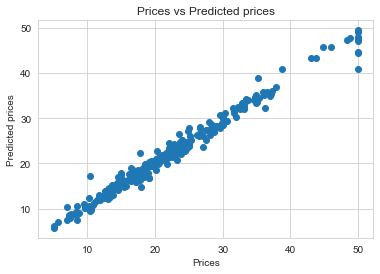

In [41]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

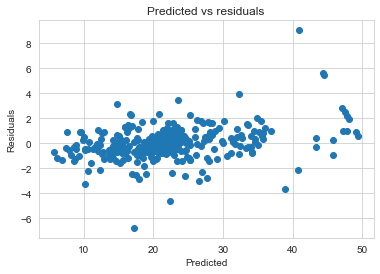

In [42]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# GUI

In [43]:
def Predict(e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,lbl_result1):
    f1=float(e1.get())
    
    f2=float(e2.get())
    
    f3=float(e3.get())
    
    f4=float(e4.get())
        
    f5=float(e5.get())
    
    f6=float(e6.get())
        
    f7=float(e7.get())
    
    f8=float(e8.get())
    
    f9=float(e9.get())

    f10=float(e10.get())
    
    f11=float(e11.get())
    
    f12=float(e12.get())
    
    f13=float(e13.get())
    
    res=np.array([[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13]])
   
    pred_price="$"+str(reg.predict(res)*1000)
    np.set_printoptions(precision=2)
    
    lbl_result1.configure(text=pred_price,font=('Lucida Handwriting',25,'bold'))

In [44]:
def Help():
    global pop
    pop=Toplevel(root)
    pop.title("HELP")
    pop.config(bg="#91b3bd")
    
    pop_label1=Label(pop,text="""
CRIM   ->  per capita crime rate by town \n
ZN     ->  proportion of residential land zoned for lots over 25,000 sq.ft.\n
INDUS  ->  proportion of non-retail business acres per town\n
CHAS   ->  Charles River dummy variable \n
NOX    ->  nitric oxides concentration (parts per 10 million)\n
RM     ->  average number of rooms per dwelling\n
AGE    ->  proportion of owner-occupied units built prior to 1940\n
DIS    ->  weighted distances to five Boston employment centres\n
RAD    ->  index of accessibility to radial highways\n
TAX    -> full-value property-tax rate per $10,000\n
PTRATIO->  pupil-teacher ratio by town\n
B      ->  1000(Bk - 0.63) ^2 where Bk is the proportion of blacks by town\n
LSTAT  ->  % lower status of the population\n
""",fg="black",bg="#91b3bd",font=("helvetica",12),justify= LEFT)
    pop_label1.pack()

In [ ]:
root =Tk()
root.title("GUI")
root.state('zoomed')
root.resizable(width = False,height = True)
root.configure(bg = "White")

def home_screen():
    MainFrame = Frame(root, bg = "#91b3bd")
    MainFrame.pack()
    root_lbl = Label(MainFrame,text = "HOUSE PRICE PREDICTION",bg = "#4A7A8C", fg = "White",font = ('',40,'italic','underline'), width=50, height=2, relief='raised', borderwidth=5)
    root_lbl.pack(anchor = N,expand = True)
    
    q_frame = Frame(MainFrame,bg = '#91b3bd', width = 1400, height=800, relief='flat', borderwidth=5)
    q_frame.pack(side = LEFT,anchor = W,expand = True)

    br_file = Label(q_frame,text = "ENTER THE DATA HERE :",bg = "#91b3bd",font = ('',28,'bold'),relief = 'flat',width = 20)
    br_file.place(relx = 0.001,rely = 0.001)
    
    
    Label(MainFrame, text='CRIM(0-89)',font=('bold',20),bg = "#91b3bd").place(relx = 0.1,rely = 0.3)
    e1 = Entry(MainFrame,font=('bold',15))
    e1.place(relx = 0.27, rely = 0.31)
    e1.focus()

    
    Label(MainFrame, text='ZN(0-100)',font=('bold',20),bg = "#91b3bd").place(relx = 0.5,rely = 0.3)
    e2= Entry(MainFrame,font=('bold',15))
    e2.place(relx = 0.68, rely = 0.31)
    e2.focus()
    
    
    Label(MainFrame, text='INDUS(0.4-28)',font=('bold',20),bg = "#91b3bd").place(relx = 0.1,rely = 0.4)
    e3 = Entry(MainFrame,font=('bold',15))
    e3.place(relx = 0.27, rely = 0.41)
    e3.focus()
    

    
    Label(MainFrame, text='CHAS(0-1)',font=('bold',20),bg = "#91b3bd").place(relx = 0.5,rely = 0.4)
    e4 = Entry(MainFrame,font=('bold',15))
    e4.place(relx = 0.68,rely = 0.41)
    e4.focus()
    
    
    Label(MainFrame, text='NOX(0.3-0.9)',font=('bold',20),bg = "#91b3bd").place(relx = 0.1,rely = 0.5)
    e5 = Entry(MainFrame,font=('bold',15))
    e5.place(relx = 0.27, rely = 0.51)
    e5.focus()
    
    
    
    Label(MainFrame, text='RM(3-9)',font=('bold',20),bg = "#91b3bd").place(relx = 0.5,rely = 0.5)
    e6 = Entry(MainFrame,font=('bold',15))
    e6.place(relx = 0.68, rely = 0.51)
    e6.focus()
    
    
    Label(MainFrame, text='AGE(2-100)',font=('bold',20),bg = "#91b3bd").place(relx = 0.1,rely = 0.6)
    e7 = Entry(MainFrame,font=('bold',15))
    e7.place(relx = 0.27, rely = 0.61)
    e7.focus()
    
    
    
    Label(MainFrame, text='DIS(1-12.5)',font=('bold',20),bg = "#91b3bd").place(relx = 0.5,rely = 0.6)
    e8 = Entry(MainFrame,font=('bold',15))
    e8.place(relx = 0.68, rely = 0.61)
    e8.focus()
    
    
    
    Label(MainFrame, text='RAD(1-24)',font=('bold',20),bg = "#91b3bd").place(relx = 0.1,rely = 0.7)
    e9 = Entry(MainFrame,font=('bold',15))
    e9.place(relx = 0.27, rely = 0.71)
    e9.focus()
    
    
    Label(MainFrame, text='TAX(187-711)',font=('bold',20),bg = "#91b3bd").place(relx = 0.5,rely = 0.7)
    e10 = Entry(MainFrame,font=('bold',15))
    e10.place(relx = 0.68, rely = 0.71)
    e10.focus()
    
    Label(MainFrame, text='PTRATIO(12.5-22)',font=('bold',20),bg = "#91b3bd").place(relx = 0.1,rely = 0.8)
    e11 = Entry(MainFrame,font=('bold',15))
    e11.place(relx = 0.27, rely = 0.81)
    e11.focus()
    
    Label(MainFrame, text='B(0.3-400)',font=('bold',20),bg = "#91b3bd").place(relx = 0.5,rely = 0.8)
    e12 = Entry(MainFrame,font=('bold',15))
    e12.place(relx = 0.68, rely = 0.81)
    e12.focus()
    
    Label(MainFrame, text='LSTAT(1.5-38)',font=('bold',20),bg = "#91b3bd").place(relx = 0.1,rely = 0.9)
    e13 = Entry(MainFrame,font=('bold',15))
    e13.place(relx = 0.27, rely = 0.91)
    e13.focus()
    
    predict_btn = Button(q_frame,text = "PREDICT",command=lambda: Predict(e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,lbl_result1),bg = "#4A7A8C",font = ('',18,'bold'),relief = 'raised')
    predict_btn.place(relx = 0.61,rely = 0.91)
    
    lbl_result1=Label(q_frame,text='Result',font=('',20,'bold'),bg='White',fg='#4A7A8C')
    lbl_result1.place(relx=0.71,rely=0.91)
    
    help_btn = Button(q_frame,text = "HELP",command = lambda:Help(),bg = "#4A7A8C",font = ('',18,'bold'),relief = 'raised')
    help_btn.place(relx = 0.91,rely = 0.91)
    
home_screen()
root.mainloop()